# Ejercicio de regularización

En este ejercicio practicamos los fundamentos de la regularización L2 (ridge), en la que la minimización de la RSS con penalización tiene una forma explícita sencilla
$$ (X^tX+\lambda I)\beta = X^ty$$
Utilizaremos los datos de una muestra sintética para conocer el verdadero modelo que tratamos de ajustar. Para ello:

 1. Escribe una función de R que reciba como input un vector `x` con la variable dependiente, un vector de parámetros ```alpha``` que contenga los coeficientes de un polinomio y una ```sigma```; y que devuelva el vector dependiente que siga la ley polinomial dada con PDF gaussiana y sigma (desviación estándar) dada.  

In [1]:
# función que genera la distribución

get.pol.n <- function(x, parameters, std.dev.a, std.dev.b){
    y <- c()
    sigma <- c()
    for (value in x){
        my.sigma  <- std.dev.a + std.dev.b * value^2
        sigma <- c(sigma, my.sigma) 
        model <- 0 
        for (i in 1:length(parameters)){
            model <- model + parameters[i] * value^(i - 1)
            }
            y <- c(y, rnorm(1, model, my.sigma))        
    }
    my.out.table <- cbind(y, sigma)
    return(as.data.frame(my.out.table))
}

 2. Construye un vector de 40 elementos distribuido uniformemente entre [-3, 3]. Úsalo con la función anterior, el polinomio: $x^3 + 2 x^2 - x - 2$, y $\sigma = 4$. Representa los datos resultantes.

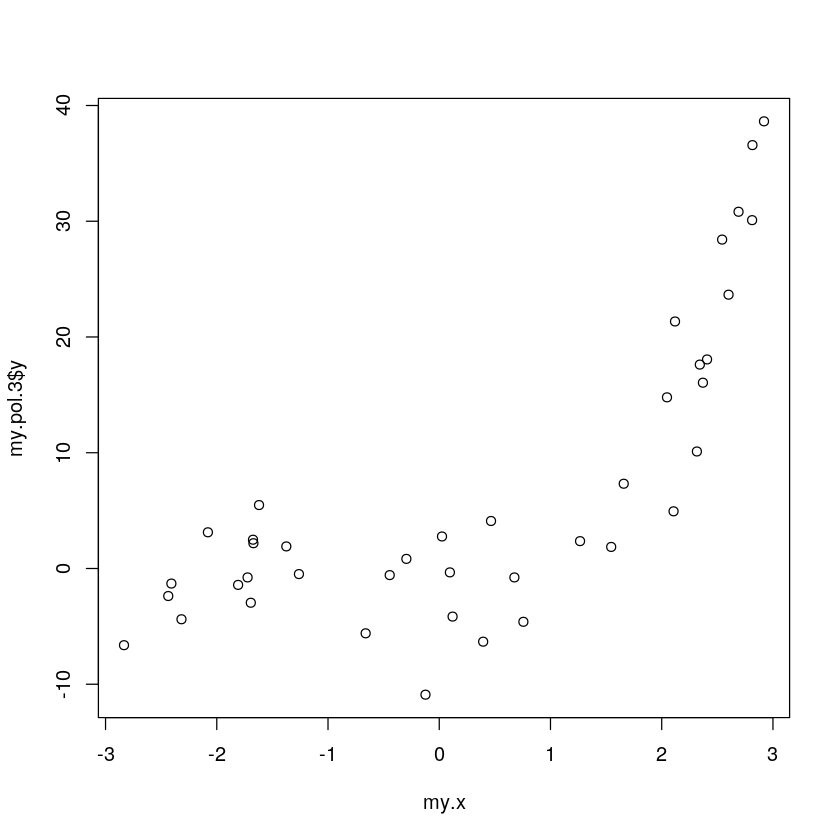

In [2]:
my.x <- runif(40, -3, 3)

pars = c(-2, -1, 2, 1)
sigma = 4

my.pol.3 <- get.pol.n(my.x, pars, sigma, 0)

plot(my.x, my.pol.3$y)

 3. Calcula el valor mínimo de la función de coste (_loss_, RSS) para el caso en que hacemos un ajuste con una recta (dos parámetros), una parábola (tres parámetros), 4, 5, 6 y 7 parámetros, usando los primeros 20 puntos. Con los valores que hacen mínimo el RSS para la muestra de entrenamiento, calcula el RSS para los siguientes 20 puntos. Pinta los resultados en función del número de parámetros para ambos casos.

In [3]:
# función que máximiza la likelihood

my.ML <- function(vec.x, mat.y, grade){
    cov.y <- diag(mat.y$sigma)
    ones <- rep(c(1), length(vec.x))
    mat.x <- cbind(ones, vec.x)
    if (grade > 1){
        for (i in 2:grade){
            mat.x <- cbind(mat.x, vec.x^i)
        }
    }
    x.T <- t(mat.x)
    xT.cov.x <- solve(x.T %*% solve(cov.y) %*% mat.x)
    xT.cov.y <- x.T %*% solve(cov.y) %*% mat.y$y
    my.params <- xT.cov.x %*% xT.cov.y
    return(my.params)
}

In [10]:
# función que saca los parametros del ajuste a un polinomio de grado 'grade'

get.aplha <- function(vec.x, vec.y, grade){
    ones <- rep(c(1), length(vec.x))
    mat.x <- cbind(ones,vec.x)
    if (grade > 1){
        for (i in 2:grade){
            mat.x <- cbind(mat.x, vec.x^i)
        }
    }
    x.T.x <- solve(t(mat.x) %*% mat.x)
    all.x <- x.T.x %*% t(mat.x)
    alpha <- all.x %*% vec.y
    return(alpha)
}

In [15]:
# función que mide la distancia entre los puntos y la curva que máximiza la likelihood

my.loss <- function(vec.x, mat.y, pars){
    ones <- rep(c(1), length(vec.x))    
    mat.x <- cbind(ones, vec.x)
    if (length(pars) > 2){
        for (i in 2:(length(pars)-1)){
            mat.x <- cbind(mat.x, vec.x^i)
        }
    }
    fit.value <- mat.x %*% pars
    dist <- mat.y - fit.value
    return(sum(dist**2))
}

In [43]:
my.plotter <- function(the.alpha){
    cols <- rainbow(10)
    pars <- c(0,0,0,0,0,0,0,0)
    for (i in 1:length(the.alpha)){
        pars[i] = the.alpha[i]
    }
    curve(pars[1]*x**0 
        + pars[2]*x**1
        + pars[3]*x**2
        + pars[4]*x**3
        + pars[5]*x**4
        + pars[6]*x**5
        + pars[7]*x**6
        + pars[8]*x**7,
          add = T,
          col = cols[i])
}

[1] 1
          [,1]
ones  5,428175
vec.x 4,243660
[1] 2
           [,1]
ones  -2,691972
vec.x  4,149698
       2,070541
[1] 3
           [,1]
ones  -3,464622
vec.x -1,781990
       2,156289
       1,116970
[1] 4
              [,1]
ones  -3,433162817
vec.x -1,789166163
       2,129897612
       1,118206765
       0,003440937
[1] 5
             [,1]
ones  -3,69467442
vec.x -0,45938223
       2,29940050
       0,53005210
      -0,01503357
       0,05699757
[1] 6
             [,1]
ones  -5,61804553
vec.x  1,20735151
       5,91316227
      -0,02586302
      -1,12543417
       0,10164315
       0,08848332
[1] 7
             [,1]
ones  -4,11080486
vec.x -4,26893408
       5,13344893
       4,40312689
      -1,00169856
      -0,89795148
       0,08251074
       0,06687244


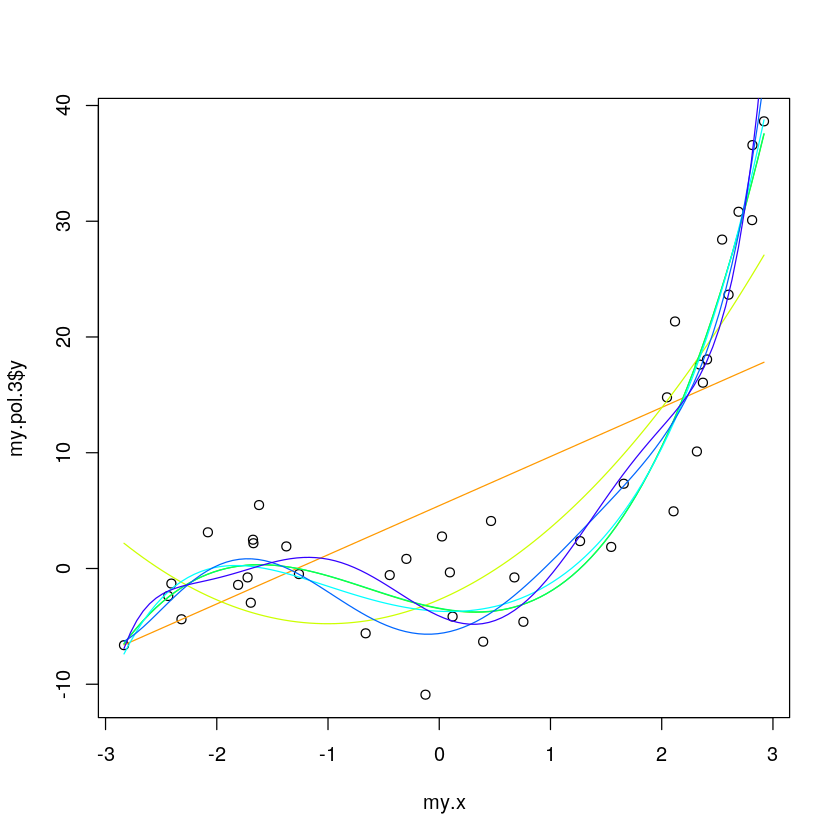

In [44]:
# Pinto mis datos
plot(my.x, my.pol.3$y)

# Ajusto los primeros eventos de mis datos a polinomios de grado 1 -> 7

my.fit <- c()
my.dist <- c()
cols <- rainbow(10)

for (i in 1:7){
    print(i)
    fit <- get.aplha(my.x[1:20], my.pol.3[1:20,1], i)
    my.fit <- c(my.fit, fit)
    my.plotter(fit)
    print(fit)
    dist <- my.loss(my.x[21:40], my.pol.3[21:40,1], fit)
    my.dist <- c(my.dist, dist)
}

 4. Escribe una función de R que encuentre el mínimo de la función de coste para el caso de regularización L2. El parámetro lambda será pasado como input. Utilízala para estimar las curvas que mejor ajustan para los casos:
  * 3 parámetros, lambda=0
  * 10 parámetros, lambda=0
  * 10 parámetros, lambda=1000

 Representa todas las curvas juntas y escribe tus conclusiones. 

5. Utiliza la función anterior para representar el valor de los parámetros del modelo en función de $\lambda$. Prueba a representar la evolución de los coeficientes de un modelo de 11 parámetros.